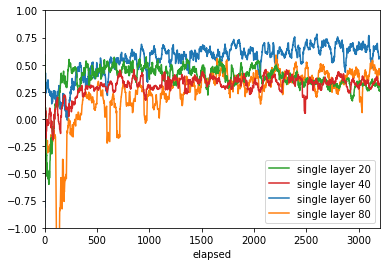

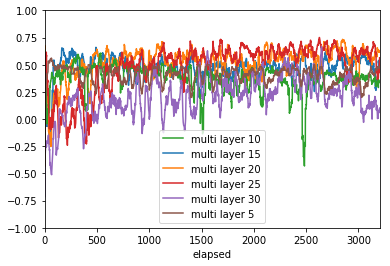

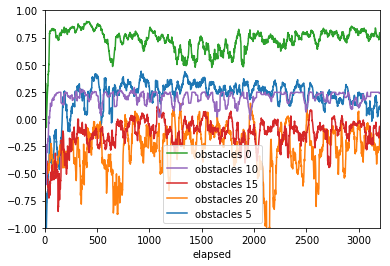

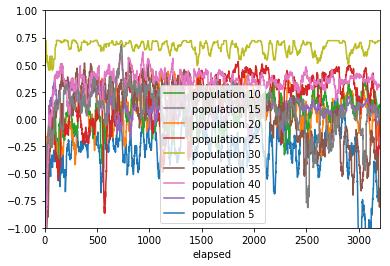

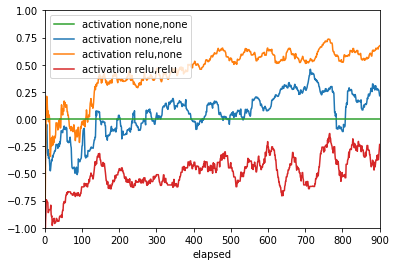

In [83]:
import matplotlib.pyplot as plt
import pandas as pd
import glob
import operator

def do_thing(name):
    files = glob.glob(name)
    if len(files) == 0:
        return None
    df = pd.read_csv(files[0])
    df.set_index('elapsed', inplace=True)
    del df['fitness']
    del df['generation']
    del df['step_size']
    lines = []
    _name = name[6:-6]
    for filename in files:
        name = str(filename[6:-4].replace('_',' '))
        tmp = pd.read_csv(filename)
        tmp.set_index('elapsed', inplace=True)
        del tmp['generation']
        del tmp['step_size']
        window = int(len(tmp) / 20)
        #tmp['fitness'] = tmp['fitness'].rolling(min_periods=1, window=window).mean()
        tmp.rename(index=str, columns={"fitness": name}, inplace=True)
        df = df.join(tmp, how='outer')
        lines += [name]
        df.index = df.index.map(int)
    df.fillna(method='backfill', inplace=True)
    df.fillna(method='pad', inplace=True)
    df.sort_index(inplace=True)
    df = df.groupby(df.index).first()
    df = df.reindex(sorted(df.columns), axis=1)
    
    for l in lines:
        df[l] = df[l].rolling(min_periods=1, window=30).mean()
    
    return (_name, df, lines)

res = [do_thing(x) for x in [
  './csv/single_layer_*.csv',
  './csv/multi_layer_*.csv',
  './csv/obstacles_*.csv',
  './csv/population_*.csv',
  './csv/activation_*.csv',
]]
res = [x for x in res if not x is None]

plots = []

for (name, df, lines) in res:
    plot = df.plot(y=[*lines])
    handles, labels = plot.get_legend_handles_labels()
    hl = sorted(zip(handles, labels), key=operator.itemgetter(1))
    a, b = zip(*hl)
    plot.legend(a,b)
    plot.set_ylim(bottom=-1, top=1)
    plot.get_figure().savefig(f'docs/images/{name}.png', dpi=200)
    
    plots += [plot]


plots

In [82]:
res

[('single_layer',
           single layer 20  single layer 40  single layer 60  single layer 80
  elapsed                                                                    
  0              -0.992924        -1.187303        -1.135348        -0.800572
  1              -0.158419        -1.276109        -0.238557        -0.419330
  2              -0.358616        -1.246507        -0.213990        -0.546410
  3              -0.099940        -1.130152         0.004066        -0.419330
  4               0.055265        -0.943060         0.134899        -0.343081
  5              -0.027970        -0.983767         0.097691        -0.275138
  6               0.072609        -0.888372         0.177769        -0.241274
  7              -0.079466        -0.925739         0.141150        -0.377369
  8               0.004484        -0.880498         0.198603        -0.339671
  9               0.071644        -0.876071         0.244566        -0.309513
  10              0.007877        -0.904365   